In [1]:
#Importing Libraries
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Reading the data and displaying first five rows
bank = pd.read_csv('bank.csv')
print (bank.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [3]:
#Dividing the dataset into dependent and independent variables.
feature_names = ['age', 'job', 'marital', 'education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']
X = bank[feature_names]
y = bank['y']

In [4]:
#Splitting the dataset in two separate parts
data_x = bank.iloc[:, :-1] #All columns and rows except last column
data_y = bank["y"]

In [23]:
#Converting the categorical target variable into numerical format
data_y.replace({"no":0,"yes":1},inplace=True)

In [24]:
#Identifying the categorical columns in independent variables

categorical_feature_mask = data_x.dtypes==object
categorical_cols=data_x.columns[categorical_feature_mask].tolist()

In [27]:
#Performing one-hot encoding on categorical variables in the dataset using the CountVectorizer class
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, data_x):
  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding feature 
    temp_cols = Vectorizer.fit_transform(data_x[i])
    data_x = add_onehot_to_dataframe(temp_cols, data_x, Vectorizer, i)
    
OneHotEncoder(categorical_cols, data_x)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  poutcome


/Users/bharat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/bharat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/bharat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/bharat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarni

In [30]:
#Dropping the categorical features as the one hot encoded representation is present
data_x = data_x.drop(categorical_cols, axis=1)

In [43]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2)
cluster = kmeans.fit(data_x)

In [34]:
identified_clusters = kmeans.fit_predict(data_x)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(data_y, identified_clusters))
print(classification_report(data_y, identified_clusters))

[[3794  206]
 [ 501   20]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4000
           1       0.09      0.04      0.05       521

    accuracy                           0.84      4521
   macro avg       0.49      0.49      0.48      4521
weighted avg       0.79      0.84      0.82      4521



In [40]:
print(confusion_matrix(data_y, identified_clusters))

[[3794  206]
 [ 501   20]]


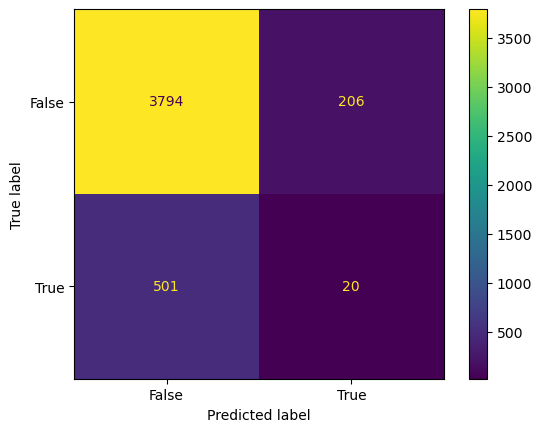

In [41]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(data_y, identified_clusters)

display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

display.plot()
plt.show()